## Spooky Author Identification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vishnukumar10/Spooky_Author_Identification/main/train.csv')
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


No null values in the dataset

In [4]:
df['text'][751]

'When exceptions did occur, they were mostly persons with no trace of aberrancy, like the old clerk at the hotel.'

## Exploratory Data Analysis and Feature Engineering

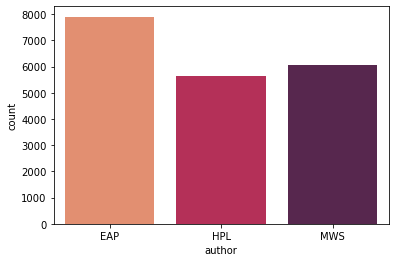

In [5]:
sns.countplot('author',data=df,palette='rocket_r')

Count of Edgar Allan Poe > Mary Shelley > HP Lovecraft. 

### WordCloud for each Author:

In [6]:
eap = " ".join(df[df['author']=='EAP']['text'].values)
mws = " ".join(df[df['author']=='MWS']['text'].values)
hpl = " ".join(df[df['author']=='HPL']['text'].values)

stopwords1 = set(STOPWORDS) 
wordcloud_eap = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords1, min_font_size = 10).generate(eap)
wordcloud_mws = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords1, min_font_size = 10).generate(mws)
wordcloud_hpl = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords1, min_font_size = 10).generate(hpl)

### WordCloud: Edgar Allan Poe

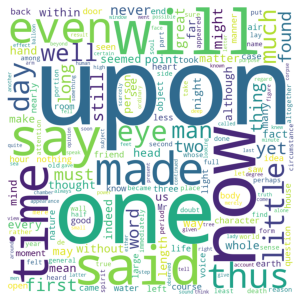

In [7]:
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud_eap) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### WordCloud: Mary Shelley

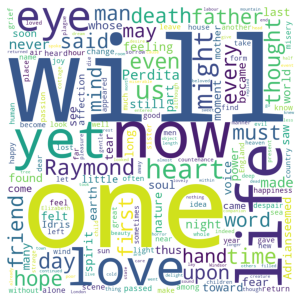

In [8]:
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud_mws) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### WordCloud: HP Lovecraft

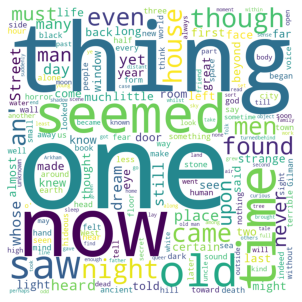

In [9]:
plt.figure(figsize = (4, 4)) 
plt.imshow(wordcloud_hpl) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

### Length of each input:

In [10]:
df['len'] = df['text'].str.len()
print('Max Length:',df['len'].max(),'words')
print('Min Length:',df['len'].min(),'words')

Max Length: 4663 words
Min Length: 21 words


A new column __ df['len'] __  has been created to find the Length of each given input

### Distribution of Length:

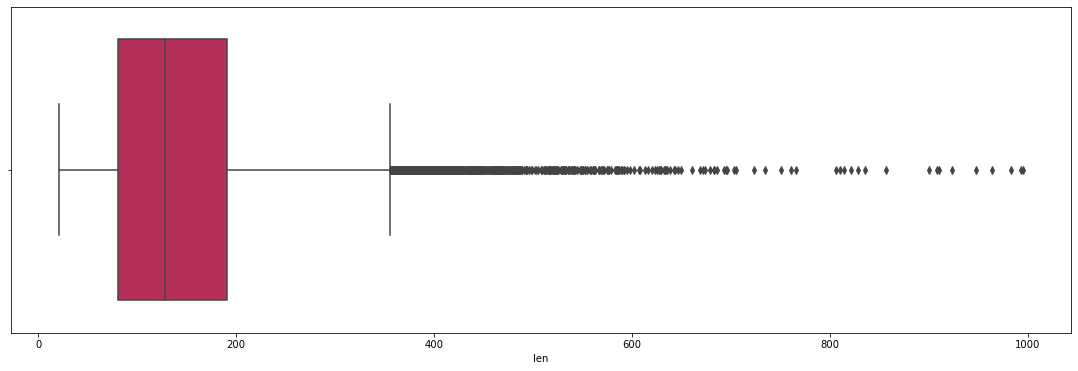

In [11]:
df1 = df[df['len']<1000]
plt.figure(figsize=(19,6))
sns.boxplot('len',data=df1,palette='rocket_r')

In [12]:
df[df['len']<50]['author'].count()

1964

### Finding if Authorship is related to length of words used 

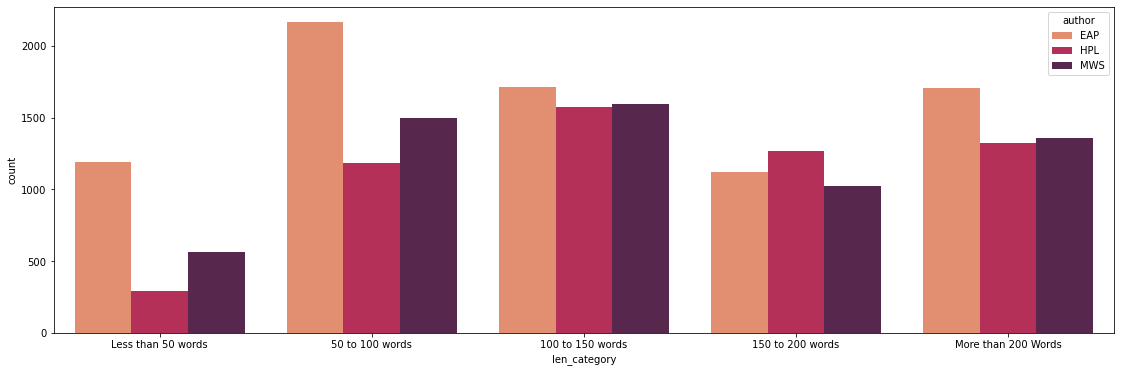

In [13]:
def lencat(temp):
    if temp>200:
        return 'More than 200 Words'
    elif temp>150:
        return '150 to 200 words'
    elif temp>100:
        return '100 to 150 words'
    elif temp>50:
        return '50 to 100 words'
    elif temp<=50:
        return 'Less than 50 words'

df['len_category']=df['len'].apply(lambda x: lencat(x))
order = pd.DataFrame(['Less than 50 words','50 to 100 words','100 to 150 words','150 to 200 words','More than 200 Words'])
plt.figure(figsize=(19,6))
sns.countplot('len_category',data=df, order=order[0], hue='author',palette='rocket_r')

150-200 words is slightly higher for HPL despite the higher input count for EAP. The other quadrants are clearly dominated by EAP, especially the lesser than 100 words category. Although, there is no clear trend found, we get an idea of the word length used by each Author.

In [14]:
df['comma_count'] = df['text'].str.count(',')
df['scolons_count'] = df['text'].str.count(';')
df['colons_count'] = df['text'].str.count(':')
df['q_marks'] = df['text'].str.count('\?')
df.head()

,id,text,author,len,len_category,comma_count,scolons_count,colons_count,q_marks
0,id26305,"This process, however, afforded me no means of...",EAP,231,More than 200 Words,4,2,0,0
1,id17569,It never once occurred to me that the fumbling...,HPL,71,50 to 100 words,0,0,0,0
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200,150 to 200 words,4,0,0,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206,More than 200 Words,3,0,0,0
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174,150 to 200 words,2,1,0,0


In [15]:
df.groupby(['author']).sum()

,len,comma_count,scolons_count,colons_count,q_marks
author,,,,,
EAP,1123585,17594,1354,176,510
HPL,878178,8581,1143,47,169
MWS,916632,12045,2662,339,419


In [16]:
stops = set(stopwords.words("english"))
article = ['a', 'an', 'the']
questions = ['What','Why','How','Where','When','Which']

In [17]:
def stopword_counter(x):
    stop_count=0
    for word in x.split():
            if word in stops:
                stop_count=stop_count+1
    return stop_count

def article_counter(x):
    article_count = 0
    for word in x.split():
            if word in article:
                article_count=article_count+1
    return article_count

def q_counter(x):
    q_count = 0
    for word in x.split():
            if word in questions:
                q_count=q_count+1
    return q_count

In [18]:
df['stop_counter'] = df['text'].apply(lambda x: stopword_counter(x))
df['article_counter'] = df['text'].apply(lambda x: article_counter(x))
df['questions_counter'] = df['text'].apply(lambda x: q_counter(x))
df.head()

,id,text,author,len,len_category,comma_count,scolons_count,colons_count,q_marks,stop_counter,article_counter,questions_counter
0,id26305,"This process, however, afforded me no means of...",EAP,231,More than 200 Words,4,2,0,0,16,4,0
1,id17569,It never once occurred to me that the fumbling...,HPL,71,50 to 100 words,0,0,0,0,7,2,0
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200,150 to 200 words,4,0,0,0,15,4,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206,More than 200 Words,3,0,0,0,11,1,1
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174,150 to 200 words,2,1,0,0,11,2,0


In [19]:
df.groupby(['author']).sum()

,len,comma_count,scolons_count,colons_count,q_marks,stop_counter,article_counter,questions_counter
author,,,,,,,,
EAP,1123585,17594,1354,176,510,90860,19224,175
HPL,878178,8581,1143,47,169,66676,13998,152
MWS,916632,12045,2662,339,419,75073,12077,206


Mary Shelley has a clear preference over the other authors on using Questioning Words and Colons and uses lesser of articles, that is [a, an, the] . While Edgar Allan Poe who despite having more input rows, has very little Semi-Colons and Colons and Question words and these are the key characteristics which help in determining the Style of the author and tells us how they  write.

In [20]:
df.iloc[0]['text']

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

## Dummy Variable Creation:

In [21]:
df[['EAP','HPL','MWS']] = pd.get_dummies(df['author'])
df.head()

,id,text,author,len,len_category,comma_count,scolons_count,colons_count,q_marks,stop_counter,article_counter,questions_counter,EAP,HPL,MWS
0,id26305,"This process, however, afforded me no means of...",EAP,231,More than 200 Words,4,2,0,0,16,4,0,1,0,0
1,id17569,It never once occurred to me that the fumbling...,HPL,71,50 to 100 words,0,0,0,0,7,2,0,0,1,0
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,200,150 to 200 words,4,0,0,0,15,4,0,1,0,0
3,id27763,How lovely is spring As we looked from Windsor...,MWS,206,More than 200 Words,3,0,0,0,11,1,1,0,0,1
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,174,150 to 200 words,2,1,0,0,11,2,0,0,1,0
